In [15]:
import numpy as np
import nibabel as nib
import pandas as pd
from joblib import Parallel, delayed

def map_values(map_fp, atlas, func):
     m = np.array(nib.load(map_fp).dataobj)
     n_labels = len(np.unique(atlas))
     label_values = [func(m[atlas==label]) for label in range(1, n_labels)]
     return label_values

def regions_values(atlas_im, maps_fp, subjects=None, labels=None, func=np.mean,
      n_jobs=7):
   
     atlas = np.array(atlas_im.dataobj)

     n_labels = len(np.unique(atlas))
     log.info('%s labels in %s'%(n_labels, atlas_fp))


     df = Parallel(n_jobs=n_jobs, verbose=1)(\
         delayed(map_values)(maps_fp[i], atlas, func)\
         for i in xrange(len(maps_fp)))

     columns = labels if not labels is None \
             else [str(e) for e in range(1, n_labels)]

     res = pd.DataFrame(df, columns=columns)

     res['subject'] = xrange(len(maps_fp)) if subjects is None else subjects
     res = res.set_index('subject')

     return res

In [5]:
atlas_fp = '/home/grg/SPM/2016-2017/ROIapoE/ROI_DARTEL/csf5/rois.nii.gz'
maps_fp = glob('/home/grg/data/ALFA_DWI/dartel_ALFA_DWI/dartel_csf.5/rswr*.nii')
subjects = [e.split('/')[-1][4:9] for e in maps_fp]
names = {1: 'Middle cerebellar peduncle', 2: 'Pontine crossing tract',
        3: 'Genu of corpus callosum', 4: 'Body of corpus callosum',
        5: 'Splenium of corpus callosum',  6: 'Fornix',
        7: 'Corticospinal tract R',  8: 'Corticospinal tract L',
        9: 'Medial lemniscus R'}
df = regions_values(atlas_fp, maps_fp, subjects=subjects, labels=names.values())
df.head()

[Parallel(n_jobs=7)]: Done 137 tasks      | elapsed:    5.8s
[Parallel(n_jobs=7)]: Done 505 out of 505 | elapsed:   16.2s finished


,Middle cerebellar peduncle,Pontine crossing tract,Genu of corpus callosum,Body of corpus callosum,Splenium of corpus callosum,Fornix,Corticospinal tract R,Corticospinal tract L,Medial lemniscus R
subject,,,,,,,,,
10538,0.000817,0.000895,0.000757,0.000818,0.000833,0.000849,0.000819,0.000834,0.000716
12252,0.000850,0.000896,0.000719,0.000816,0.000817,0.000850,0.000843,0.000834,0.000743
55708,0.000853,0.000929,0.000732,0.000851,0.000795,0.000922,0.000839,0.000872,0.000786
12121,0.000842,0.000926,0.000810,0.000846,0.000826,0.000868,0.000810,0.000822,0.000723
11015,0.000847,0.000879,0.000805,0.000877,0.000856,0.000839,0.000814,0.000792,0.000831


/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


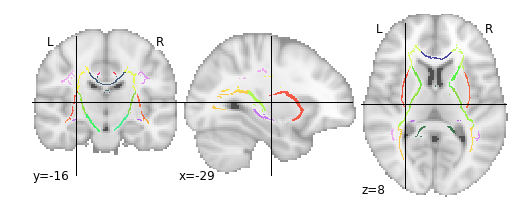

In [1]:
fp = '/home/grg/TBSS/ALFA_DWI/roivalues/jhu-labels_skeleton.nii.gz'
%matplotlib inline
from nilearn import image, plotting, datasets
rois = image.load_img(fp)
plotting.plot_roi(rois)

In [2]:
from glob import glob
import os.path as op
maps_fp = sorted(glob('/tmp/amylstaging_FA/*nii.gz'))
subjects = [op.basename(e).split('_')[0] for e in maps_fp]
labels, _ = datasets.fetch_atlas_JHU('ICBM-tracts-maxprob-thr25-1mm')

df = regions_values(rois, maps_fp, subjects, labels)

/usr/lib/fsl/5.0
('data/atlases/JHU/JHU-ICBM-tracts-maxprob-thr25-1mm.nii.gz', 'http://neurovault.org/media/images/264/JHU.tgz', {'uncompress': True})


ValueError: Dataset files are missing but dataset repository is read-only. Contact your data administrator to solve the problem

In [1]:
from nilearn import datasets

In [2]:
datasets.fetch_atlas_JHU('ICBM-tracts-maxprob-thr25-1mm')

/usr/lib/fsl/5.0
('data/atlases/JHU/JHU-ICBM-tracts-maxprob-thr25-1mm.nii.gz', 'http://neurovault.org/media/images/264/JHU.tgz', {'uncompress': True})


ValueError: Dataset files are missing but dataset repository is read-only. Contact your data administrator to solve the problem